In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
df= sns.load_dataset('iris')

In [3]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [4]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()
df['species']= encoder.fit_transform(df['species'])

In [5]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [7]:
df= df[['sepal_length','petal_length','species']]
df.head()

,sepal_length,petal_length,species
0,5.1,1.4,0
1,4.9,1.4,0
2,4.7,1.3,0
3,4.6,1.5,0
4,5.0,1.4,0


In [8]:
x= df.iloc[:, 0:2]
y=df.iloc[:,-1]

In [44]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test= train_test_split(x,y, test_size=0.2, random_state=1)

In [45]:
# Multinomial Logistic Regression

In [46]:
from sklearn.linear_model import LogisticRegression

In [47]:
clf= LogisticRegression(multi_class='multinomial')

In [48]:
clf.fit(x_train, y_train)

LogisticRegression(multi_class='multinomial')

In [49]:
y_pred=clf.predict(x_test)
y_pred


array([0, 1, 1, 0, 2, 1, 2, 0, 0, 2, 1, 0, 2, 1, 1, 0, 1, 1, 0, 0, 1, 1,
       2, 0, 2, 1, 0, 0, 1, 2])

In [50]:
from sklearn.metrics import accuracy_score, confusion_matrix

In [51]:
print(accuracy_score(y_test, y_pred))

0.9666666666666667


In [52]:
confusion_matrix(y_test, y_pred)

array([[11,  0,  0],
       [ 0, 12,  1],
       [ 0,  0,  6]], dtype=int64)

In [53]:
#prediction
query= np.array([[3.4,2.7]])
clf.predict_proba(query)

C:\Users\shrey\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([[8.61961258e-01, 1.37344798e-01, 6.93944190e-04]])

In [54]:
clf.predict(query)

C:\Users\shrey\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([0])

In [55]:
pip install mlxtend

Note: you may need to restart the kernel to use updated packages.


In [56]:
from mlxtend.plotting import plot_decision_regions
import matplotlib.pyplot as plt

C:\Users\shrey\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


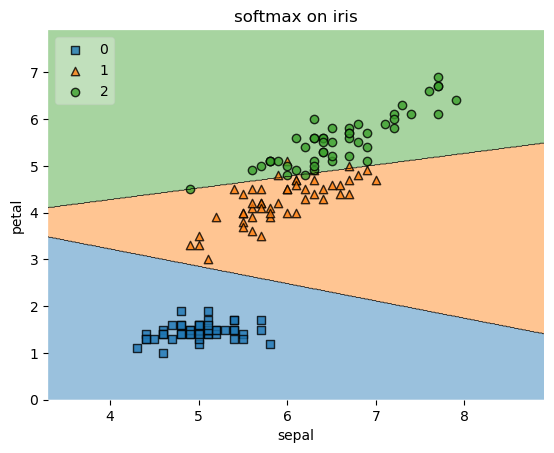

In [57]:
plot_decision_regions(x.values, y.values, clf, legend=2)
plt.xlabel('sepal')
plt.ylabel('petal')
plt.title('softmax on iris')
plt.show()

In [58]:
# Decision Tree classifier and Logistic Regression

In [63]:
from sklearn.tree import DecisionTreeClassifier
clf1= LogisticRegression()
clf2= DecisionTreeClassifier()


In [64]:
clf1.fit(x_train, y_train)
clf2.fit(x_train, y_train)

DecisionTreeClassifier()

In [66]:
y_pred1= clf1.predict(x_test)
y_pred2= clf2.predict(x_test)


In [67]:
print('accuracy of LoR:', accuracy_score(y_test, y_pred1))
print('accuracy of DT:', accuracy_score(y_test, y_pred2))

accuracy of LoR: 0.9666666666666667
accuracy of DT: 0.9666666666666667


In [76]:
print("Logistic Regression Confusion Matrix\n")
pd.DataFrame(confusion_matrix(y_test,y_pred1),columns=list(range(0,3)))

Logistic Regression Confusion Matrix



,0,1,2
0,11,0,0
1,0,12,1
2,0,0,6


In [77]:
print("Decision Tree Confusion Matrix\n")
pd.DataFrame(confusion_matrix(y_test,y_pred2),columns=list(range(0,3)))

Decision Tree Confusion Matrix



,0,1,2
0,11,0,0
1,0,12,1
2,0,0,6


In [78]:
result = pd.DataFrame()
result['Actual Label'] = y_test
result['Logistic Regression Prediction'] = y_pred1
result['Decision Tree Prediction'] = y_pred2
result.sample(10)

,Actual Label,Logistic Regression Prediction,Decision Tree Prediction
44,0,0,0
35,0,0,0
78,1,1,1
120,2,2,2
56,1,1,1
90,1,1,1
19,0,0,0
42,0,0,0
94,1,1,1
66,1,1,1


In [79]:
from sklearn.metrics import precision_score,recall_score
precision_score(y_test,y_pred1,average=None)

array([1.        , 1.        , 0.85714286])

In [80]:
precision_score(y_test,y_pred2,average=None)

array([1.        , 1.        , 0.85714286])

In [81]:
recall_score(y_test,y_pred1,average=None)

array([1.        , 0.92307692, 1.        ])

In [82]:
recall_score(y_test,y_pred2,average=None)

array([1.        , 0.92307692, 1.        ])